<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# *Blending* - Melhorando o modelo de concessão de crédito

## Importação das bibliotecas

In [7]:
!pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Módulos de manipulação de dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Métricas de Desempenho
import preditiva

## Importação da base de dados

In [9]:
df_emprestimos = pd.read_csv('emprestimos.csv', sep=';')
df_emprestimos

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,H,Pos Graduacao,Propria,Pouco,Sem conta,1736,12,0
996,40,M,Ensino Medio,Propria,Pouco,Pouco,3857,30,0
997,38,M,Graduacao,Propria,Pouco,Sem conta,804,12,0
998,23,M,Graduacao,De favor,Pouco,Pouco,1845,45,1


## Preparação dos Dados

### Missing Values

In [12]:
df_emprestimos.isnull().sum()

Idade                   0
Genero                  0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Default                 0
dtype: int64

### Duplicações

In [14]:
df_emprestimos.duplicated().sum()

0

### Tipos de Variáveis

In [15]:
df_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

C:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


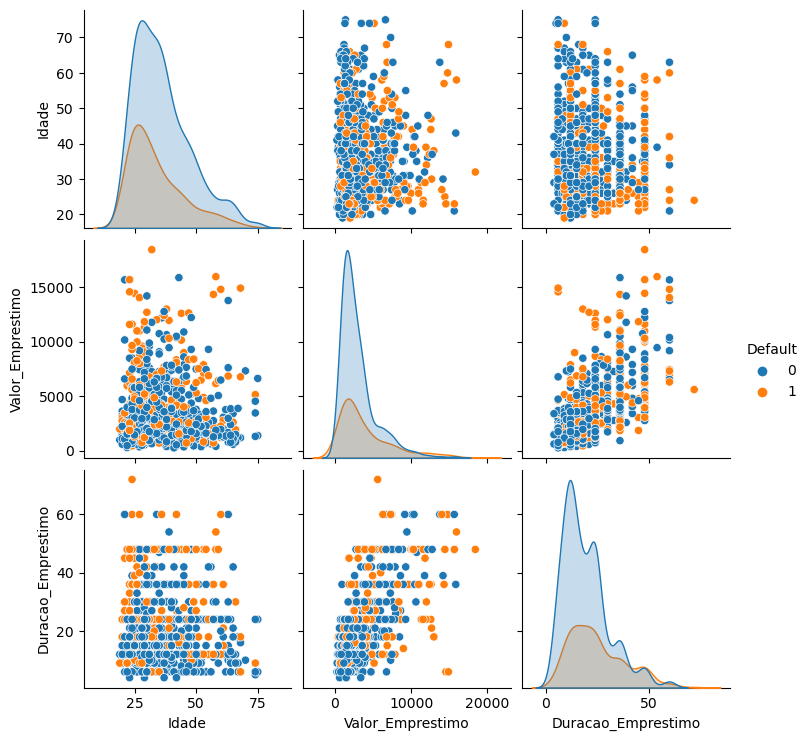

In [16]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_emprestimos, hue='Default');

### Relatórios Pandas Profiling e SweetViz

In [17]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df_emprestimos,
                                                     target_feat='Default')
sns.reset_defaults()

C:\Users\Thiago\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |                                             | [  0%]   00:00 ->…

Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [18]:
df_emprestimos.head()

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


In [20]:
# Target (variável resposta)
y_var = 'Default'
y = df_emprestimos[y_var]

# Features (variáveis explicativas)
x_var = ['Idade','Genero','Escolaridade','Tipo_Moradia',
         'Saldo_Investimento','Saldo_Conta_Corrente',
         'Valor_Emprestimo','Duracao_Emprestimo']
x = pd.get_dummies(df_emprestimos[x_var], drop_first=True)

In [21]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Default, dtype: int64

In [22]:
x.head()

,Idade,Valor_Emprestimo,Duracao_Emprestimo,Genero_M,Escolaridade_Graduacao,Escolaridade_Pos Graduacao,Tipo_Moradia_De favor,Tipo_Moradia_Propria,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,67,1169,6,True,True,False,False,True,False,False,True,False,True,False
1,22,5951,48,False,True,False,False,True,False,True,False,True,False,False
2,49,2096,12,True,False,True,False,True,False,True,False,False,False,True
3,45,7882,42,True,True,False,True,False,False,True,False,False,True,False
4,53,4870,24,True,True,False,True,False,False,True,False,False,True,False


### Divisão das bases em Treino e Teste

In [23]:
# Divisão em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [24]:
y_train.head()

541    0
440    0
482    0
422    0
778    0
Name: Default, dtype: int64

In [25]:
x_train.head()

,Idade,Valor_Emprestimo,Duracao_Emprestimo,Genero_M,Escolaridade_Graduacao,Escolaridade_Pos Graduacao,Tipo_Moradia_De favor,Tipo_Moradia_Propria,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
541,60,2032,24,True,True,False,True,False,False,True,False,False,False,True
440,39,1884,12,True,False,False,False,True,False,True,False,False,False,True
482,57,3622,30,False,True,False,False,False,False,False,False,False,True,False
422,47,958,12,True,False,True,False,True,False,True,False,True,False,False
778,38,5711,36,True,False,False,False,True,False,False,False,False,False,True


In [26]:
x_train.shape

(700, 14)

In [27]:
x_test.shape

(300, 14)

### Treine / Ajuste um Modelo e calcule as métricas de desempenho

In [28]:
# Ajuste do Modelo
modelo_rl = LogisticRegression()
modelo_rl.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.754286,0.740000,-0.02
AUROC,0.764050,0.766970,0.00
KS,0.421550,0.440507,0.04
Precision,0.643411,0.627451,-0.02
Recall,0.397129,0.351648,-0.11
F1,0.491124,0.450704,-0.08


### Importação do Score de um modelo externo

In [30]:
bureaux = pd.read_excel('base_bureaux.xlsx')
bureaux

,row ID,Prob_Bureaux
0,Row0,0.359671
1,Row1,0.277591
2,Row2,0.343538
3,Row3,0.348337
4,Row4,0.464622
...,...,...
995,Row995,0.151015
996,Row996,0.362011
997,Row997,0.423744
998,Row998,0.561119


### Geração dos Scores dos Modelos 1 e 2 na base original

In [31]:
df_emprestimos['Prob_Interno'] = modelo_rl.predict_proba(pd.get_dummies(df_emprestimos[x_var], drop_first=True))[:,1]
df_emprestimos['Prob_Bureaux'] = bureaux['Prob_Bureaux']

In [32]:
df_emprestimos

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default,Prob_Interno,Prob_Bureaux
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0,0.071071,0.359671
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1,0.702031,0.277591
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0,0.069606,0.343538
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0,0.697846,0.348337
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1,0.483243,0.464622
...,...,...,...,...,...,...,...,...,...,...,...
995,31,H,Pos Graduacao,Propria,Pouco,Sem conta,1736,12,0,0.150890,0.151015
996,40,M,Ensino Medio,Propria,Pouco,Pouco,3857,30,0,0.469593,0.362011
997,38,M,Graduacao,Propria,Pouco,Sem conta,804,12,0,0.078251,0.423744
998,23,M,Graduacao,De favor,Pouco,Pouco,1845,45,1,0.796490,0.561119


### Separação da nova base em Treino e Teste

In [33]:
# Separação das variáveis explicativas e a variável target
y_var = 'Default'
y = df_emprestimos[y_var]

x_var_blend = ['Prob_Interno','Prob_Bureaux']
x_blend = pd.get_dummies(df_emprestimos[x_var_blend], drop_first=True)

# Divisão em treino e teste
x_blend_train, x_blend_test, y_blend_train, y_blend_test = train_test_split(x_blend, y, 
                                                                            test_size=0.30,
                                                                            random_state=42)

In [34]:
y_blend_train.head()

541    0
440    0
482    0
422    0
778    0
Name: Default, dtype: int64

In [35]:
x_blend_train.head()

,Prob_Interno,Prob_Bureaux
541,0.118915,0.267779
440,0.092477,0.277792
482,0.398425,0.180088
422,0.208885,0.381842
778,0.145770,0.284455


### Blending dos Modelos usando Árvore de Decisão

In [39]:
# Treinamento do Modelo
modelo_blend = DecisionTreeClassifier(max_depth=4)
modelo_blend.fit(x_blend_train, y_blend_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_blend, x_blend_train, y_blend_train, x_blend_test, y_blend_test)

,Treino,Teste,Variação
Acurácia,0.850000,0.836667,-0.02
AUROC,0.916054,0.884510,-0.03
KS,0.677038,0.618066,-0.09
Precision,0.765306,0.750000,-0.02
Recall,0.717703,0.692308,-0.04
F1,0.740741,0.720000,-0.03


### Comparação com Modelo Interno

In [40]:
# Modelo Interno
preditiva.calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.754286,0.740000,-0.02
AUROC,0.764050,0.766970,0.00
KS,0.421550,0.440507,0.04
Precision,0.643411,0.627451,-0.02
Recall,0.397129,0.351648,-0.11
F1,0.491124,0.450704,-0.08


### Impacto trazido pelo Modelo do Bureaux

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
y_pred_rl = modelo_rl.predict(x)
y_pred_blend = modelo_blend.predict(x_blend)

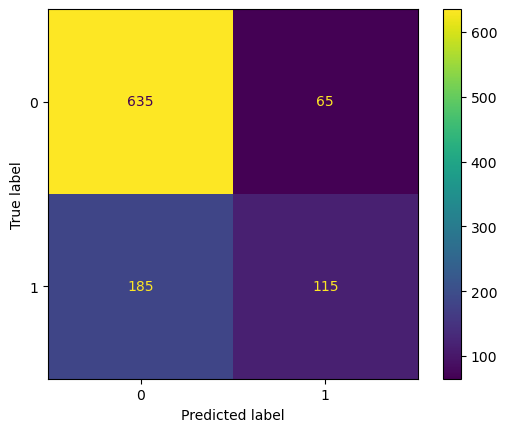

In [43]:
# Matriz de Confusão do Modelo Interno
%matplotlib inline
cm_interno = confusion_matrix(y, y_pred_rl)
ConfusionMatrixDisplay(cm_interno).plot();

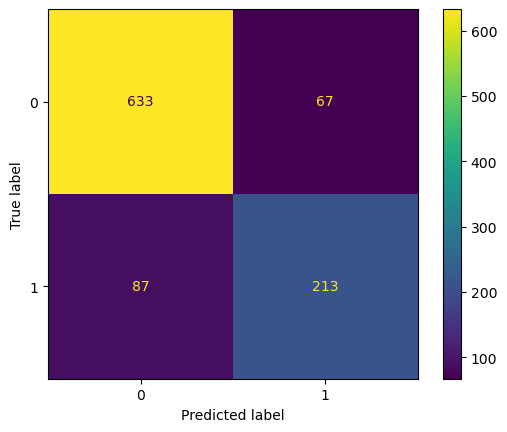

In [44]:
# Matriz de Confusão do Modelo Blend
%matplotlib inline
cm_blend = confusion_matrix(y, y_pred_blend)
ConfusionMatrixDisplay(cm_blend).plot();